# For Assighment_1

In [1]:
# import package block
import os
import sys
sys.path.append('./src/')
from PIL import Image, ImageOps
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import kl_div
from scipy.stats import kstest
import seaborn as sns
sns.set_style("white")

from helper_for_assign_1 import * 
helper = helper_for_assign_1()

# Task 1

#### problem 1

dog1
(100, 100)


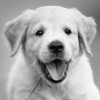

dog2
(100, 100)


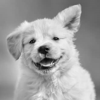

dog3
(100, 100)


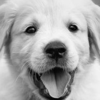

In [2]:
# prepare two images that are fairly similar
# open pic
# resize
# show size
img1 = Image.open('./pic_for_assignment/dog1.jpg')
img1 = img1.resize((100, 100)) 
img1 = ImageOps.grayscale(img1)
print('dog1')
print(img1.size)
display(img1)

img2 = Image.open('./pic_for_assignment/dog2.jpg')
img2 = img2.resize((100, 100))
img2 = ImageOps.grayscale(img2)
print('dog2')
print(img2.size)
display(img2)

img3 = Image.open('./pic_for_assignment/dog3.jpg')
img3 = img3.resize((100, 100))
img3 = ImageOps.grayscale(img3)
print('dog3')
print(img3.size)
display(img3)

##### problem 2

In [3]:
# Draw a histogram of each image in the previous task is somehow the 
# distribution of the image. Plot the histogram of each image.

# image to numpy
# flatten the array
np1 = np.array(img1)
np1 = np1.flatten()

np2 = np.array(img2)
np2 = np2.flatten()

# do the hist
n_bin = 30

plt.subplot(1, 2, 1)
c1, e1, b1 = plt.hist(np1, bins=n_bin)
plt.title('hist for dog1')
f1 = c1 / (100*100)

plt.subplot(1, 2, 2)
c2, e2, b2 = plt.hist(np2, bins=n_bin)
f2 = c2 / (100*100)
plt.title('hist for dog2')

# print the count of each bin
print('frequency of each bins')
df = pd.DataFrame(data=[f1, f2]).T  
df.columns = ['dog1', 'dog2']
display(df.head())

frequency of each bins


,dog1,dog2
0,0.0054,0.0017
1,0.0043,0.0029
2,0.0048,0.0038
3,0.0039,0.0021
4,0.0052,0.0022


##### problem 3

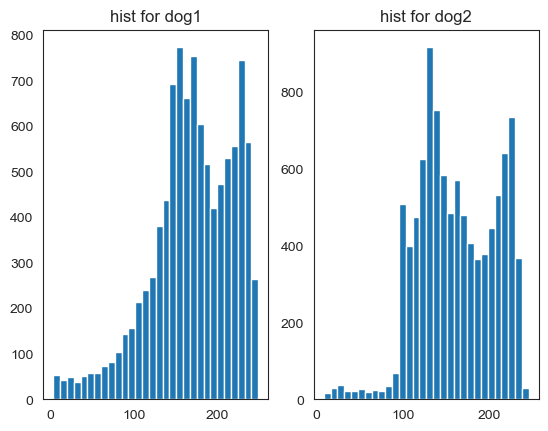

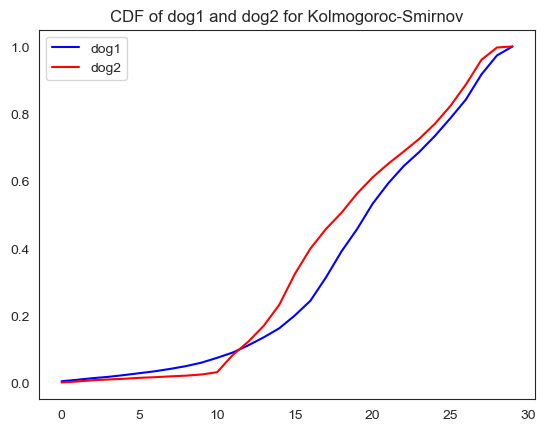

KstestResult(statistic=0.36666666666666664, pvalue=0.034580084963334506)
KL-Divergence is 0.1564069649127912
JS-divergence is 0.15419611380442777


In [4]:
# Compare the distributions between both images with Kolmogorov-Smirnov, KL-Divergence, and JS-Divergence.

#  Kolmogorov-Smirnov
cum1 = helper.cum_sum(f1)
cum2 = helper.cum_sum(f2)
x = list(range(len(cum1)))

fig = plt.figure()
plt.plot(x, cum1, color='blue', label='dog1')
plt.plot(x, cum2, color='red', label='dog2') 
plt.legend()
plt.title('CDF of dog1 and dog2 for Kolmogoroc-Smirnov')
plt.show()

ks = kstest(f1, f2)
print(f'{ks}')


# KL-Divergence
kl = helper.kl_divergence(f1, f2)
print(f'KL-Divergence is {kl}')

# JS-Divergence
js = helper.js_divergence(f1, f2)
print(f'JS-divergence is {js}')


# Task 2

##### problem 1

,index,x,y,z,label
0,0,28.277351,23.95457,24.342942,c1
1,1,21.35823,20.783009,20.282473,c1
2,2,23.425842,18.81782,16.286365,c1
3,3,21.489049,22.011205,20.043405,c1
4,4,20.568713,17.210033,21.194745,c1
...,...,...,...,...,...
2995,995,1.902444,8.459044,0.105592,c3
2996,996,6.547085,6.219917,5.766411,c3
2997,997,8.045032,4.161248,7.470387,c3
2998,998,3.286761,6.758254,3.031938,c3


Text(0.5, 1.0, 'Z axis')

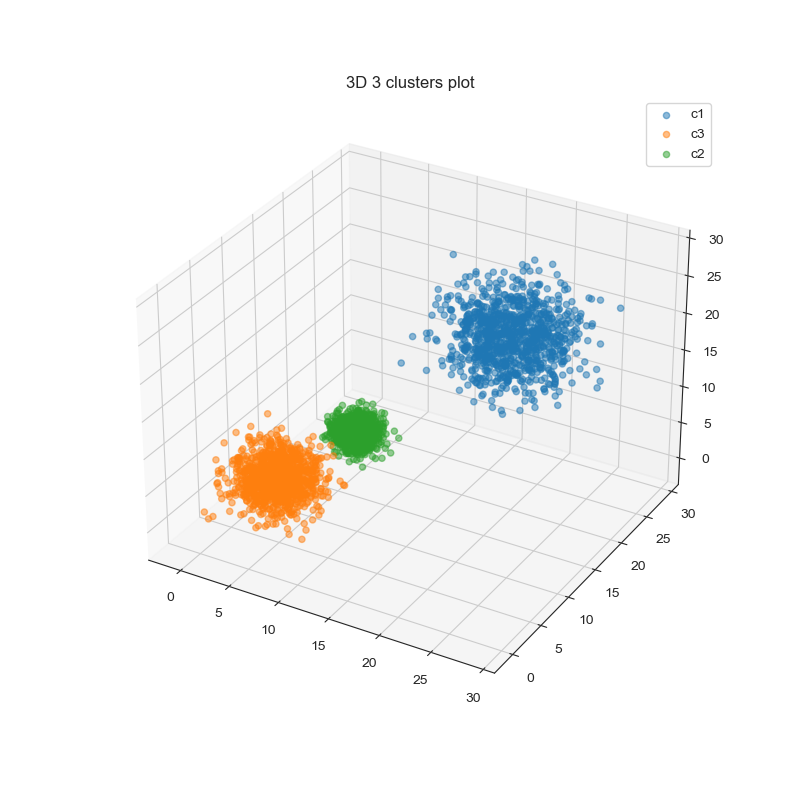

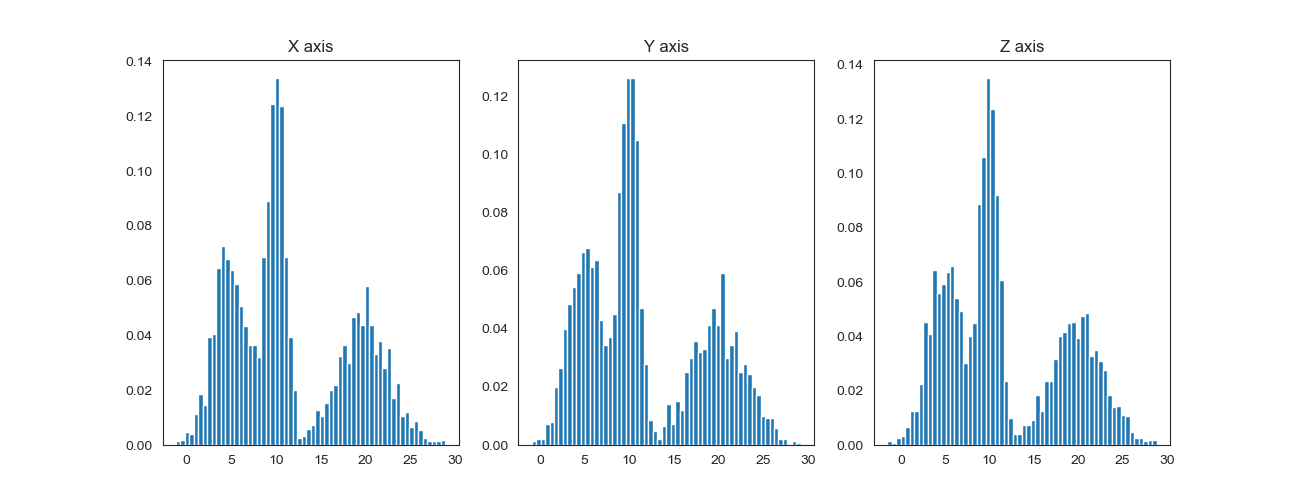

In [5]:
# Create a random dataset in 3D space that has 3 clusters.
%matplotlib widget
# define the three centers
c1 = (20, 20, 20)
c2 = (10, 10, 10)
c3 = (5, 5, 5)
sigma = (3, 1, 2)

# create three random dataset based on c1, c2, c3
n = 1000 
# c1
df1 = helper.cluster_data_3d(c1[0], c1[1], c1[2], sigma[0], n, 'c1')
# c2
df2 = helper.cluster_data_3d(c2[0], c2[1], c2[2], sigma[1], n, 'c2')
# c3
df3 = helper.cluster_data_3d(c3[0], c3[1], c3[2], sigma[2], n,'c3')
# combine the df 
frames = [df1, df2, df3]
df_combine = helper.combine_df(frames)
display(df_combine)


# display the dataset
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')
group = set(df_combine.label)
for g in group:
    df_filter = df_combine[df_combine.label == g]
    ax.scatter3D(df_filter.x, df_filter.y, df_filter.z, 
                label=g, 
                alpha=0.5,
                marker='o')
ax.legend()
plt.title('3D 3 clusters plot')


# plot for each axis
fig = plt.figure(figsize=(13, 5)) 
plt.subplot(1, 3, 1)
# x axis
f_x = plt.hist(df_combine.x, bins=60, density=True)
plt.title('X axis')
# y axis
plt.subplot(1, 3, 2)
f_y = plt.hist(df_combine.y, bins=60, density=True)
plt.title('Y axis')
# z axis
plt.subplot(1, 3, 3)
f_z = plt.hist(df_combine.z, bins=60, density=True)
plt.title('Z axis')



#### problem 2

In [6]:
# By using Expectation Maximization algorithms, try to implement
# Gaussian Mixture Modeling (GMM) clustering algorithm and cluster
# these data correctly.

# show true distribution 
print(f"c1 is x=({c1[0]}, {sigma[0]}), y=({c1[1]}, {sigma[0]}), z=({c1[2]}, {sigma[0]})")
print(f"c2 is x=({c2[0]}, {sigma[1]}), y=({c2[1]}, {sigma[1]}), z=({c2[2]}, {sigma[1]})")
print(f"c3 is x=({c3[0]}, {sigma[2]}), y=({c3[1]}, {sigma[2]}), z=({c3[2]}, {sigma[2]})")


# gmm 
n_iter = 30 
# for x axis
data = df_combine.x
best_gmm_x, last_gmm = helper.gmm_train(data, n_iter, verbose=False)
print()
print('X axis')
print(f'({best_gmm_x.g1.mu:.2f}, {best_gmm_x.g1.sigma:.2f}), ({best_gmm_x.g2.mu:.2f}, {best_gmm_x.g2.sigma:.2f}), ({best_gmm_x.g3.mu:.2f}, {best_gmm_x.g3.sigma:.2f})')

# for y axis
data = df_combine.y
best_gmm_y, last_gmm = helper.gmm_train(data, n_iter, verbose=False)
print()
print('Y axis')
print(f'({best_gmm_x.g1.mu:.2f}, {best_gmm_x.g1.sigma:.2f}), ({best_gmm_x.g2.mu:.2f}, {best_gmm_x.g2.sigma:.2f}), ({best_gmm_x.g3.mu:.2f}, {best_gmm_x.g3.sigma:.2f})')

# for z axis 
data = df_combine.z
best_gmm_z, last_gmm = helper.gmm_train(data, n_iter, verbose=False)
print()
print('Z axis')
print(f'({best_gmm_x.g1.mu:.2f}, {best_gmm_x.g1.sigma:.2f}), ({best_gmm_x.g2.mu:.2f}, {best_gmm_x.g2.sigma:.2f}), ({best_gmm_x.g3.mu:.2f}, {best_gmm_x.g3.sigma:.2f})')

c1 is x=(20, 3), y=(20, 3), z=(20, 3)
c2 is x=(10, 1), y=(10, 1), z=(10, 1)
c3 is x=(5, 2), y=(5, 2), z=(5, 2)

X axis
(22.75, 2.27), (19.26, 2.03), (7.70, 3.24)

Y axis
(22.75, 2.27), (19.26, 2.03), (7.70, 3.24)

Z axis
(22.75, 2.27), (19.26, 2.03), (7.70, 3.24)


Text(0.5, 1.0, 'Z AXIS')

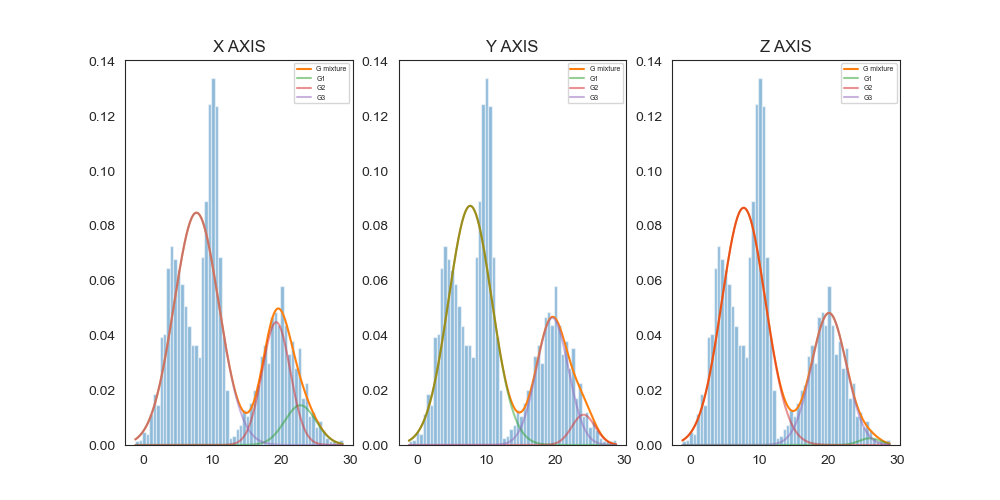

In [7]:
# plot out the result 
# plot x axis mixture 
fig = plt.figure(figsize=(10, 5)) 
plt.subplot(1, 3, 1)
helper.plot_gmm_mixture(best_gmm_x, df_combine.x)
plt.title('X AXIS')

# plot y axis mixture
plt.subplot(1, 3, 2)
helper.plot_gmm_mixture(best_gmm_y, df_combine.x)
plt.title('Y AXIS')

# ploy z axis mixture
plt.subplot(1, 3, 3)
helper.plot_gmm_mixture(best_gmm_z, df_combine.x)
plt.title('Z AXIS')


#### problem3

Text(0.5, 1.0, 'final iteration')

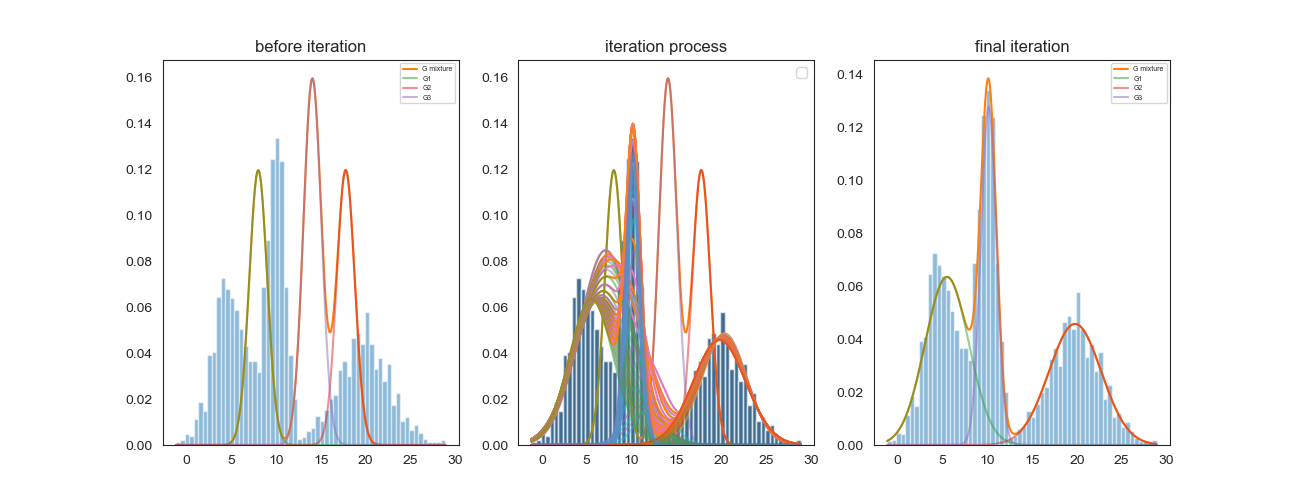

In [8]:
# You should visualize at least two E and M steps in between
# take X AXIS data as demonstration 

data = df_combine.x
n_iter = 20
gmm = GMM_for_3_cluster(data)

fig = plt.figure(figsize=(13, 5))
plt.subplot(1, 3, 1)
helper.plot_gmm_mixture(gmm, data)
plt.title("before iteration")


plt.subplot(1, 3, 2)
helper.plot_gmm_mixture(gmm, data)
for i in range(n_iter):
    plt.subplot(1, 3, 2)
    gmm.iterate(verbose=False)
    helper.plot_gmm_mixture(gmm, data)
plt.title('iteration process')
plt.legend('', frameon='False')

plt.subplot(1, 3, 3)
helper.plot_gmm_mixture(gmm, data)
plt.title('final iteration')

